In [1]:
from src.gradients import sobelPolar, sobelCartesian, norm
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


Amogus laden.

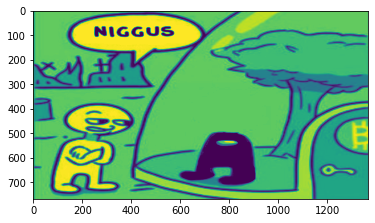

In [2]:
img_amogus = cv2.imread("resources/sample_amogus.jpg", cv2.IMREAD_GRAYSCALE)
_, ax = plt.subplots()
ax.imshow(img_amogus)
plt.show()

Saftigen Gradienten ziehen

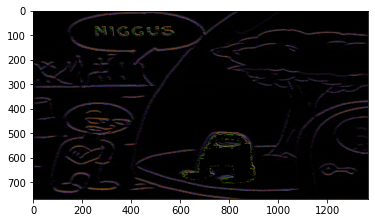

In [3]:

(img_amogus_gradient_theta, img_amogus_gradient_r) = sobelPolar(img_amogus)

img_amogus_gradient_hsv = np.stack([norm(img_amogus_gradient_r),
                                    np.ones(img_amogus_gradient_r.shape),
                                    norm(img_amogus_gradient_theta)], axis=-1)

img_amogus_gradient_rgb = matplotlib.colors.hsv_to_rgb(img_amogus_gradient_hsv)

_,ax = plt.subplots()
ax.imshow(img_amogus_gradient_rgb)
plt.show()